In [1]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Reading data
loan_data = pd.read_csv('loan.csv')

In [3]:
# Reading few records
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Check the shape and dataTypes
print(loan_data.shape)
print(loan_data.dtypes)

(39717, 111)
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


### Data Cleaning

In [5]:
## Check if any duplicate rows present
duplicate_data = loan_data[loan_data.duplicated(['id'])]
duplicate_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit


In [6]:
## Fetch Empty columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [7]:
### Drop the columns where all values are Empty
loan_data=loan_data.dropna(how='all', axis=1)
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [8]:
### Drop the Rows where all values are Empty
loan_data=loan_data.dropna(how='all')
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [9]:
### Find the Columns where most values are null
missing_per = loan_data.isnull().sum() * 100 / len(loan_data)
missing_value_loan_data = pd.DataFrame({'column': loan_data.columns,'missing%':missing_per})
missing_value_loan_data.sort_values('missing%',inplace = True)
missing_value_loan_data

,column,missing%
id,id,0.000000
dti,dti,0.000000
delinq_2yrs,delinq_2yrs,0.000000
earliest_cr_line,earliest_cr_line,0.000000
inq_last_6mths,inq_last_6mths,0.000000
policy_code,policy_code,0.000000
open_acc,open_acc,0.000000
pub_rec,pub_rec,0.000000
revol_bal,revol_bal,0.000000
addr_state,addr_state,0.000000


In [10]:
### Drop the Columns where most values are null
loan_data = loan_data.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq','desc','emp_title'] , axis=1)


In [11]:
loan_data.shape

(39717, 52)

In [12]:
### Drop the Columns which has string values or may nor related for analysis
column_names= ["zip_code","tax_liens","url"]
loan_data = loan_data.drop(labels=column_names, axis=1)
loan_data.shape

(39717, 49)

In [13]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0


### Handling Incorrect Data Types 

In [14]:
loan_data.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mths                  int64
open_acc                        int64
pub_rec                         int64
revol_bal   

In [15]:
#Converting term column to int as it could help in further Analysis
loan_data.term = loan_data.term.str.strip()
loan_data.term = loan_data.term.str[:2]
loan_data.term.head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

In [16]:
loan_data.term = loan_data.term.astype("int32")
loan_data.term.dtype

dtype('int32')

In [17]:
#Converting int_rate column to float as it could help in further Analysis
loan_data.int_rate = loan_data.int_rate.str.rstrip("%")

In [18]:
loan_data.int_rate = loan_data.int_rate.astype("float64")
loan_data.int_rate.dtype

dtype('float64')

In [19]:
loan_data.emp_length.describe

<bound method NDFrame.describe of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 39717, dtype: object>

In [20]:
#Based on Data dictionary possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
#loan_data.emp_length =  pd.to_numeric(loan_data.emp_length.apply(lambda x : 0 if '<' in x else (x.split('+')[0] if '+' in x else x.split()[0])))
#loan_data.emp_length.head()

### Derive Columns from date type Columns

In [21]:
#Convert issue_d into month and year
loan_data['issue_month'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y').dt.month
loan_data.issue_month.head()

0    12
1    12
2    12
3    12
4    12
Name: issue_month, dtype: int64

In [22]:
loan_data['issue_year'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y').dt.year
loan_data.issue_year.head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: issue_year, dtype: int64

In [23]:
#Droping Customer behaviourial variables : as during the Initial  application of we may not have these variable for the new customers
loan_data = loan_data.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'] , axis=1)
loan_data.shape

(39717, 30)

### Outliner Treatment

In [24]:
#Outliner verification on important columns : loan_amnt,annual_inc,int_rate
loan_data['annual_inc'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

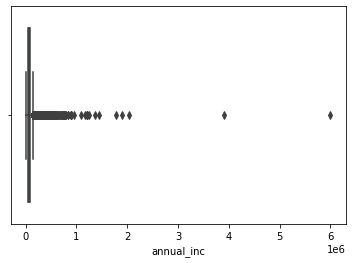

In [25]:
sns.boxplot(loan_data.annual_inc)

In [26]:
### Analysis : Above grapth shows that outliners are present and hence removing the outliners will help in further analysis
### From the above data it seems that most of the values are between 100000.0 
loan_data.annual_inc.quantile(0.90) 

116000.0

<AxesSubplot:xlabel='annual_inc'>

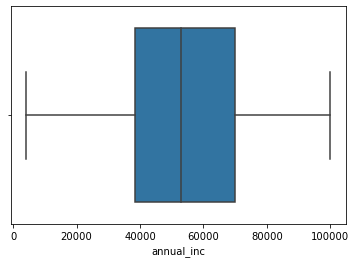

In [27]:
loan_data = loan_data[loan_data.annual_inc <= 100000.0]
loan_data.annual_inc.describe()
sns.boxplot(loan_data.annual_inc)

In [28]:
#As annual income was having outliners,hence there are high chances that those outliner indivisuals would have taken higher higher loan amount 
#Hence after verifying loan amount  column also for outliners if still present
loan_data['loan_amnt'].describe()

count    34030.000000
mean     10325.042609
std       6772.135225
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='loan_amnt'>

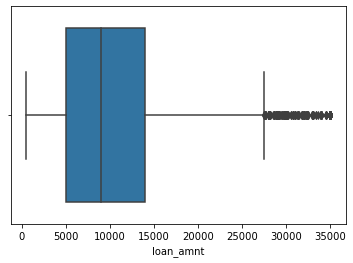

In [29]:
sns.boxplot(loan_data.loan_amnt)

In [30]:
###From the above graph it seems that there are few outliners after 26000, Hence cleaning up those few record will give us more refine data

<AxesSubplot:xlabel='loan_amnt'>

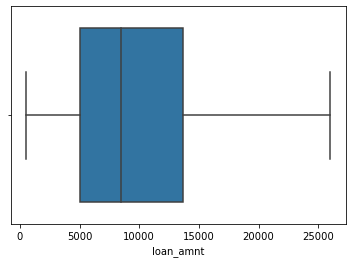

In [31]:
loan_data = loan_data[loan_data.loan_amnt <= 26000.0]
loan_data.loan_amnt.describe()
sns.boxplot(loan_data.loan_amnt)

<AxesSubplot:xlabel='funded_amnt_inv'>

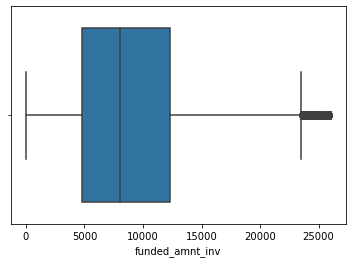

In [32]:
sns.boxplot(loan_data.funded_amnt_inv)

In [33]:
#As per above graph:  Similar to loan_amount funded amount by investors also has few outliners
loan_data.funded_amnt_inv.quantile(0.98) 

24000.0

<AxesSubplot:xlabel='funded_amnt_inv'>

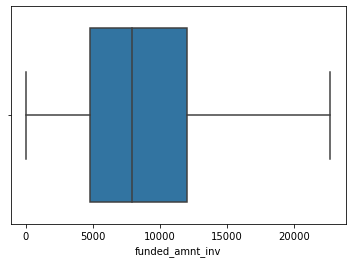

In [34]:
#It seems that more than 98% funded_amnt_inv is less than 22722. Hence we can clean up 2% records to get the refine data
loan_data = loan_data[loan_data.funded_amnt_inv <= 22722.0]
sns.boxplot(loan_data.funded_amnt_inv)

<AxesSubplot:xlabel='funded_amnt'>

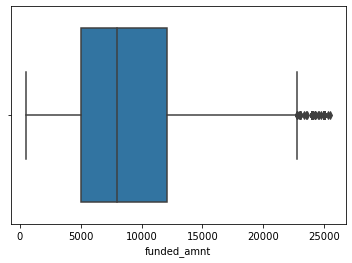

In [35]:
sns.boxplot(loan_data.funded_amnt)

In [36]:
#As per above graph:  Similar to loan_amount funded amount also has few outliners
loan_data.funded_amnt.quantile(0.99) 

22000.0

<AxesSubplot:xlabel='funded_amnt'>

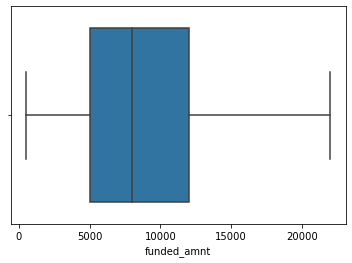

In [37]:
#It seems that more than 99% funded_amnt_inv is less than 22000.0. Hence we can clean up 1% records to get the refine data
loan_data = loan_data[loan_data.funded_amnt <= 22000.0]
sns.boxplot(loan_data.funded_amnt)

<AxesSubplot:xlabel='int_rate'>

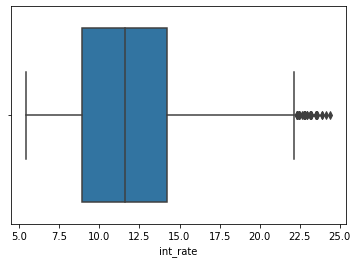

In [38]:
sns.boxplot(loan_data.int_rate)

In [39]:
loan_data.int_rate.describe()

count    31998.000000
mean        11.736983
std          3.574422
min          5.420000
25%          8.900000
50%         11.580000
75%         14.220000
max         24.400000
Name: int_rate, dtype: float64

In [40]:
###From the above graph it seems that there are few outliners after 26000, Hence cleaning up those few record will give us more refine data
loan_data.int_rate.quantile(0.99) 

20.3

<AxesSubplot:xlabel='int_rate'>

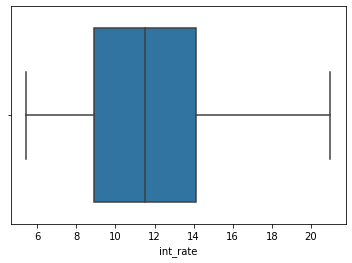

In [41]:
#It seems that more than 99% loans intrest rate is less than 21. Hence we can clean up 1% records to get the refine data
loan_data = loan_data[loan_data.int_rate <= 21.0]
loan_data.int_rate.describe()
sns.boxplot(loan_data.int_rate)

### Univariate Analysis

In [42]:
# Check what are the different type of loans
loan_data.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'medical',
       'major_purchase', 'moving', 'vacation', 'house',
       'renewable_energy', 'educational'], dtype=object)

In [43]:
# Check what are the percentage of different type of loans
(loan_data.purpose.value_counts()*100)/len(loan_data)

debt_consolidation    46.819139
credit_card           12.839685
other                 10.703402
home_improvement       6.490528
major_purchase         5.855927
car                    4.303980
small_business         4.030662
wedding                2.481857
medical                1.825265
moving                 1.555088
vacation               1.074424
educational            0.892212
house                  0.873362
renewable_energy       0.254469
Name: purpose, dtype: float64

In [44]:
### Mostly customer has taken loan for debt_consolidation,credit_card and other purpose

In [45]:
# Check what are the different loan status is present
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [46]:
# Check what are the percentage of 'Fully Paid',defaulted or 'Charged Off',running loans
(loan_data.loan_status.value_counts()*100)/len(loan_data)

Fully Paid     83.431246
Charged Off    14.237693
Current         2.331061
Name: loan_status, dtype: float64

In [47]:
### Around 82% of loans are fully paid ,however around 14% loans are defaulted

In [51]:
#Removing 2% of Current loans as these can be 'Fully Paid' or 'Charged Off' in future. Hence this data will not help us finding insights out of this
loan_data = loan_data[loan_data.loan_status != 'Current']
loan_data.shape

(31089, 30)

In [52]:
#Check what are the different term data is present
loan_data.term.unique()

array([36, 60], dtype=int32)

In [53]:
# Check what are the percentage of '36' & '60' term months
(loan_data.term.value_counts()*100)/len(loan_data)

36    78.545466
60    21.454534
Name: term, dtype: float64

In [54]:
### It seems that more people are obtaining for shorter term 

<AxesSubplot:xlabel='grade', ylabel='count'>

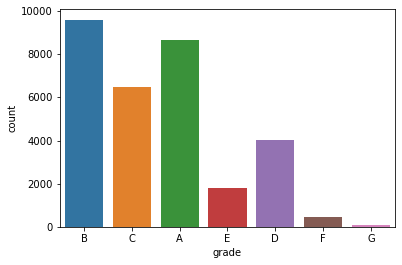

In [55]:
sns.countplot(x='grade',data = loan_data)

In [56]:
#It seems that mostly A,B,C grade people are obtaining for loans compering to others

<AxesSubplot:xlabel='int_rate_gp', ylabel='count'>

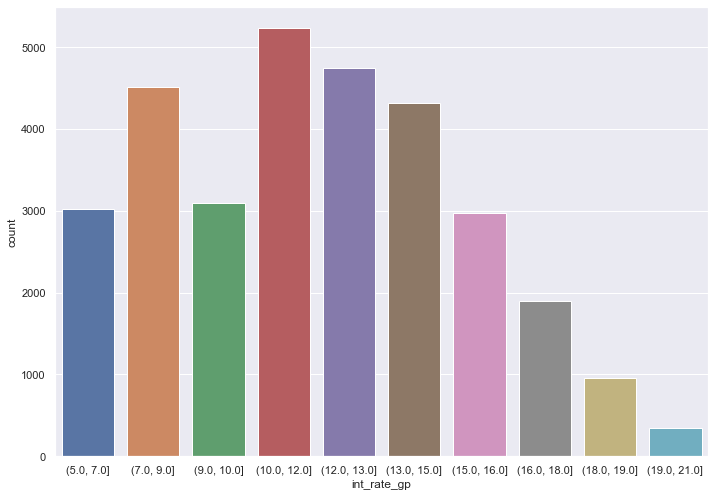

In [75]:
#Create intrest group from int_rate column to see what Percentage of int_rate is mostly given
loan_data['int_rate_gp'] = pd.cut(loan_data['int_rate'], bins=10,precision=0)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='int_rate_gp',data = loan_data)

In [76]:
#It seems that most loans are opted between 10-15% intrest rate and 7-9% intrest also .
#Also the higher intrest rate less number of loans